In [17]:
!pip install torchinfo


[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# 新たに追加
import numpy as np
import torch.quantization
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.quantization as quant
import time
import os
import psutil
import torch.nn.utils.prune as prune
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchinfo import summary

In [19]:
def setup_all_seed(seed=0):
    # numpyに関係する乱数シードの設定
    np.random.seed(seed)
    
    # pytorch
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

In [20]:
#訓練データ
train_dataset = torchvision.datasets.FashionMNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download = True)
#検証データ
test_dataset = torchvision.datasets.FashionMNIST(root='./data',
                                           train=False,
                                           transform=transforms.ToTensor(),
                                           download = True)

In [21]:
#print(len(train_dataset))
#train_dataset[0]

print(f"trainデータセットの画像枚数: {len(train_dataset)} 枚")
print(f"testデータセットの画像枚数: {len(test_dataset)} 枚")
print(f"trainデータセットの最初の画像とlabel: {train_dataset[0]}")

trainデータセットの画像枚数: 60000 枚
testデータセットの画像枚数: 10000 枚
trainデータセットの最初の画像とlabel: (tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.00

train_dataset[0] の fig, label を取得
fig : tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863,

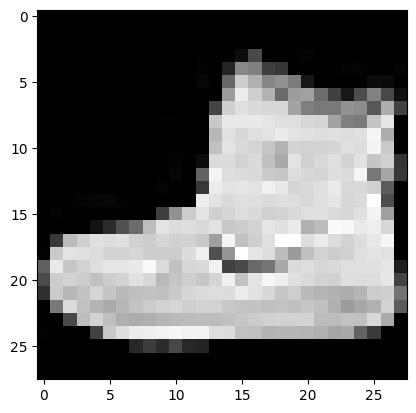

In [22]:
# データセットの最初の画像のfig(画像データ), label(カテゴリ番号)を取得
fig, label = train_dataset[0]
#print(f"train_dataset[0] の fig, label を取得", 
      #f"fig : {fig}", 
      #f"label : {label}", 
      #end="\n")
print(f"train_dataset[0] の fig, label を取得", end="\n")
print(f"fig : {fig}", end="\n")
print(f"label : {label}", end="\n")

# figのサイズを表示
print(f"fig.size() : {fig.size()}")

# plt.imshowでfigを表示
plt.imshow(fig.view(-1, 28), cmap='gray')
print(f"データセットの最初の画像")

In [23]:
batch_size = 256

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)


In [24]:
# モデル定義 
class Net(nn.Module):
    def __init__(self, input_size, hidden1_size, hidden2_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden2_size, output_size)
        

    def forward(self, x): # x : 入力
        x = x.view(x.size(0), -1)
        z1 = self.relu1(self.fc1(x))
        z2 = self.relu2(self.fc2(z1))
        y = self.fc3(z2)
        return y

In [25]:
input_size = 28*28
hidden1_size = 1024
hidden2_size = 512
output_size = 10

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = Net(input_size, hidden1_size, hidden2_size, output_size).to(device)
print(model)
summary(model, input_size=(1, 1, 28, 28))

Net(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)


Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1, 10]                   --
├─Linear: 1-1                            [1, 1024]                 803,840
├─ReLU: 1-2                              [1, 1024]                 --
├─Linear: 1-3                            [1, 512]                  524,800
├─ReLU: 1-4                              [1, 512]                  --
├─Linear: 1-5                            [1, 10]                   5,130
Total params: 1,333,770
Trainable params: 1,333,770
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 1.33
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 5.34
Estimated Total Size (MB): 5.35

In [26]:
# プルーニングの適用
# 例: fc1の50%をプルーニング
prune.l1_unstructured(model.fc1, name="weight", amount=0.5)
# fc2の50%をプルーニング
prune.l1_unstructured(model.fc2, name="weight", amount=0.5)

# プルーニング後の重みの削除
prune.remove(model.fc1, 'weight')
prune.remove(model.fc2, 'weight')

# プルーニング結果の確認
print("\nプルーニング後のモデル:")
print(model)

summary(model, input_size=(1, 28, 28))  # 入力サイズを(1, 28, 28)に修正


プルーニング後のモデル:
Net(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)


Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1, 10]                   --
├─Linear: 1-1                            [1, 1024]                 803,840
├─ReLU: 1-2                              [1, 1024]                 --
├─Linear: 1-3                            [1, 512]                  524,800
├─ReLU: 1-4                              [1, 512]                  --
├─Linear: 1-5                            [1, 10]                   5,130
Total params: 1,333,770
Trainable params: 1,333,770
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 1.33
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 5.34
Estimated Total Size (MB): 5.35

In [27]:
# 損失関数　criterion：基準
# CrossEntropyLoss：交差エントロピー誤差関数
criterion = nn.CrossEntropyLoss()

# 最適化法の指定　optimizer：最適化
# SGD：確率的勾配降下法
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [28]:
def train_model(model, train_loader, criterion, optimizer, device='cpu'):
    train_loss = 0.0
    correct = 0  # 正答数
    num_train = 0

    model.train()  # 学習モードに切り替え

    for images, labels in train_loader:
        num_train += len(labels)

        images, labels = images.view(-1, 28*28).to(device), labels.to(device)
        
        optimizer.zero_grad()  # 勾配の初期化
        outputs = model(images)  # 順伝播

        # 損失の計算
        loss = criterion(outputs, labels)
        loss.backward()  # 誤差逆伝播
        optimizer.step()  # パラメータの更新

        train_loss += loss.item()

        # 正答数を計算
        _, predicted = torch.max(outputs, 1)  # 最も高いスコアのクラスを取得
        correct += (predicted == labels).sum().item()  # 正解と一致する数を加算
    
    # lossの平均
    train_loss = train_loss / num_train
    accuracy = correct / num_train  # 正答率

    return train_loss, accuracy  # 正答率を追加して返す

In [29]:
def test_model(model, test_loader, criterion, device='cpu'):
    test_loss = 0.0
    correct = 0
    num_test = 0

    model.eval()  # 評価モードに切り替え

    with torch.no_grad():  # 勾配計算を無効化
        for images, labels in test_loader:
            num_test += len(labels)
            images, labels = images.view(-1, 28*28).to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            # 正答数を計算
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()

    test_loss = test_loss / num_test
    accuracy = correct / num_test  # 正答率

    return test_loss, accuracy  # 正答率を追加して返す

In [30]:
def lerning(model, train_loader, test_loader, criterion, optimizer, num_epochs, device='cpu'):
    train_loss_list = []
    test_loss_list = []
    train_accuracy_list = []
    test_accuracy_list = []

    for epoch in range(1, num_epochs + 1):
        # Trainの時間計測開始
        train_start_time = time.time()
        train_loss, train_accuracy = train_model(model, train_loader, criterion, optimizer, device=device)
        train_end_time = time.time()
        train_duration = train_end_time - train_start_time  # Trainの所要時間を計算

        # Testの時間計測開始
        test_start_time = time.time()
        test_loss, test_accuracy = test_model(model, test_loader, criterion, device=device)
        test_end_time = time.time()
        test_duration = test_end_time - test_start_time  # Testの所要時間を計算

        print(f"Epoch: {epoch}, Trainの損失: {train_loss:.5f}, Trainの正答率: {train_accuracy * 100:.1f}%, "
              f"Trainの時間: {train_duration:.2f} seconds")
        print(f"Testの損失: {test_loss:.5f}, Testの正答率: {test_accuracy * 100:.1f}%, "
              f"Testの時間: {test_duration:.2f} seconds\n")

        train_loss_list.append(train_loss)
        test_loss_list.append(test_loss)
        train_accuracy_list.append(train_accuracy)
        test_accuracy_list.append(test_accuracy)

    return train_loss_list, test_loss_list, train_accuracy_list, test_accuracy_list

In [31]:
num_epochs = 10
train_loss_list, test_loss_list, train_accuracy_list, test_accuracy_list = lerning(
    model, train_loader, test_loader, criterion, optimizer, num_epochs, device=device
)

Epoch: 1, Trainの損失: 0.00797, Trainの正答率: 44.8%, Trainの時間: 3.11 seconds
Testの損失: 0.00657, Testの正答率: 60.0%, Testの時間: 0.34 seconds

Epoch: 2, Trainの損失: 0.00509, Trainの正答率: 63.4%, Trainの時間: 3.09 seconds
Testの損失: 0.00430, Testの正答率: 65.2%, Testの時間: 0.34 seconds

Epoch: 3, Trainの損失: 0.00373, Trainの正答率: 67.5%, Trainの時間: 3.02 seconds
Testの損失: 0.00353, Testの正答率: 68.1%, Testの時間: 0.32 seconds

Epoch: 4, Trainの損失: 0.00319, Trainの正答率: 70.7%, Trainの時間: 3.20 seconds
Testの損失: 0.00311, Testの正答率: 70.8%, Testの時間: 0.35 seconds

Epoch: 5, Trainの損失: 0.00289, Trainの正答率: 73.7%, Trainの時間: 2.86 seconds
Testの損失: 0.00290, Testの正答率: 74.1%, Testの時間: 0.33 seconds

Epoch: 6, Trainの損失: 0.00269, Trainの正答率: 76.0%, Trainの時間: 2.93 seconds
Testの損失: 0.00272, Testの正答率: 75.8%, Testの時間: 0.40 seconds

Epoch: 7, Trainの損失: 0.00253, Trainの正答率: 77.8%, Trainの時間: 3.17 seconds
Testの損失: 0.00259, Testの正答率: 77.0%, Testの時間: 0.35 seconds

Epoch: 8, Trainの損失: 0.00240, Trainの正答率: 79.1%, Trainの時間: 2.67 seconds
Testの損失: 0.00250, Testの正答率: 77.7%,

In [32]:
# モデルを保存
pruned_model_path = "pruned_model.pth"
torch.save(model.state_dict(), pruned_model_path)

In [35]:
# ファイルサイズの確認
file_size = os.path.getsize(pruned_model_path) / (1024 * 1024)  # サイズをMBに変換
print(f"Pruned model file size: {file_size:.2f} MB")

Pruned model file size: 5.09 MB


In [37]:
# プロセスのCPUメモリ使用量を確認する関数
def get_cpu_memory_usage():
    process = psutil.Process(os.getpid())
    memory_info = process.memory_info().rss / (1024 * 1024)  # MBに変換
    print(f"Memory used by the process on CPU: {memory_info:.2f} MB")

# モデルをロードしてメモリ使用量を確認
model = Net(input_size=28*28, hidden1_size=1024, hidden2_size=512, output_size=10)  # モデルの定義に合わせてください
model.load_state_dict(torch.load(pruned_model_path))

# ロード後のメモリ使用量を確認
get_cpu_memory_usage()

Memory used by the process on CPU: 85.58 MB


/var/folders/m7/nx1rzqm52tb66v1r18gk_ptw0000gp/T/ipykernel_70023/97949196.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(pruned_model_p